<a href="https://colab.research.google.com/github/SimranaSinha/Python_Projects/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

- Panda is used for data Manipulation and analysis.
- Numpy is used for Numerical Operations.
- Matplotlib and Seaborn is used for Data Visualization.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the dataset**

Mounting Google Drive into the Colab environment will enable easy file handling and facilitate operations such as reading, writing, and manipulation.

In [46]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Creating a data frame**

In [47]:
dataframe= pd.read_csv('/content/drive/MyDrive/Zomato data .csv')

In [48]:
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [49]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Convert the data tyoe of Column-rate

In [50]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [51]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# **Type of Restuarant**

In [52]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restuarant')

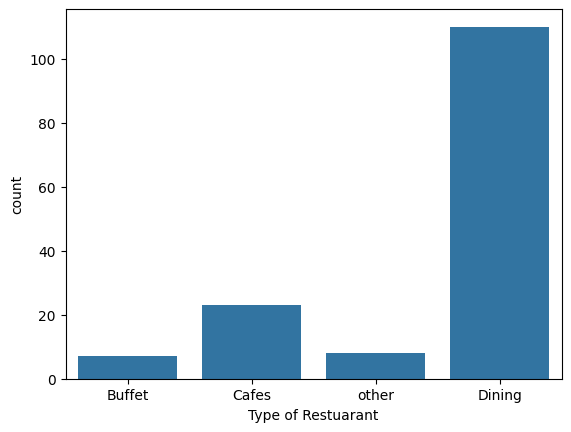

In [53]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restuarant")

# Conclusion


Majority of the Restuarant falls in Dining Category

# **Votes has each type of resturant received**

In [54]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Votes Received by Each Type of Restuarant')

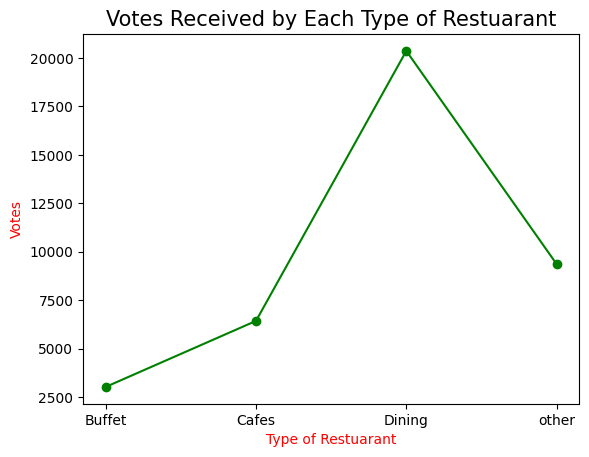

In [55]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes': grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Type of Restuarant',c='red',size=10)
plt.ylabel('Votes',c='red',size=10)

plt.title('Votes Received by Each Type of Restuarant',c='black',size=15)

# Conclusion

Dinning Restuarant has received maximum votes.

# **Ratings majority of resturants have received**

In [56]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


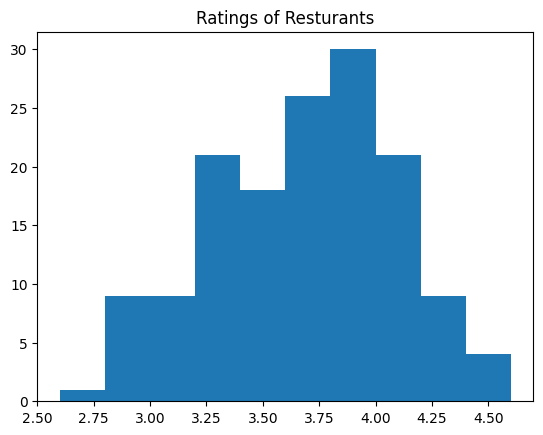

In [59]:
plt.hist(dataframe['rate'],bins=10)
plt.title('Ratings of Resturants')
plt.show()

# Conclusion

The majority Resturants received ratings from 3.5 to 4

# **Average order spending by couples**

In [60]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


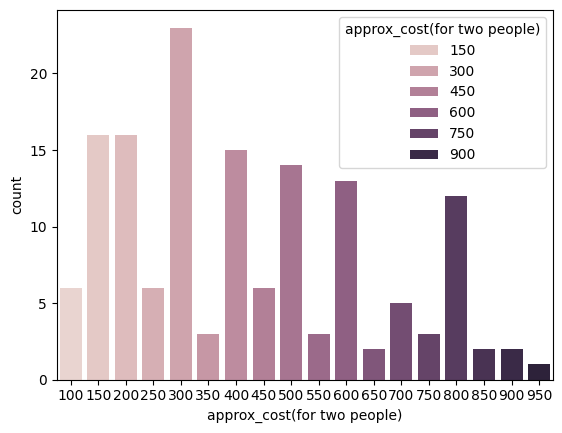

In [63]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,hue=couple_data)
plt.show()

# Conclusion

The majority of couples prefer restuarants with an approximate cost of 300 rupees.

# **Maximum Rating (Online/Offline)**

In [65]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<ipython-input-70-e5876c3262ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order',y='rate',data=dataframe, palette=palette)


<Axes: xlabel='online_order', ylabel='rate'>

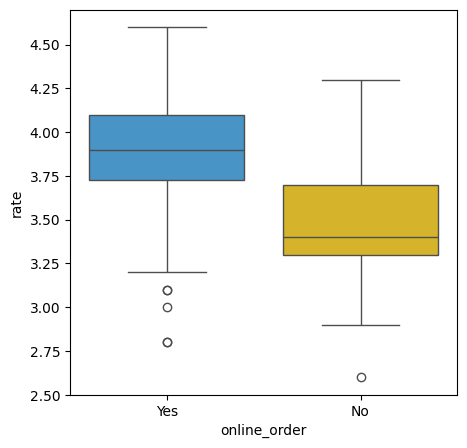

In [70]:
plt.figure(figsize=(5,5))
palette = ["#3498db", "#f1c40f"]
sns.boxplot(x='online_order',y='rate',data=dataframe, palette=palette)

# Conclusion

Offline order received lower rating in comparison to online order

# **Restaurant received more offline orders (Zomato good offer)**

In [71]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


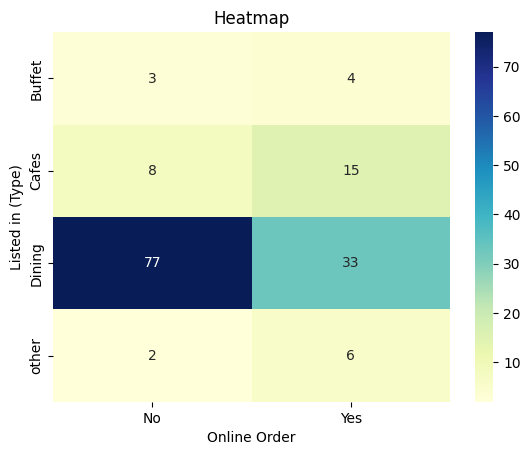

In [73]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size')
pivot_table = pivot_table.fillna(0)  # Fill missing values with 0 after creating the pivot table
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed in (Type)')
plt.show()

# Conclusion

Dining restuarants primarily accept offline orders, whereas cafes receives online orders.This suggests that the clients prefer to order in person at restuarant, but prefer online ordering at cafes.